In [39]:
d_names = ['1138_bus', 'USpowerGrid', 'dwt_1005', 'poli', 'qh882', '3elt', 'dwt_2680']
d_name = d_names[6]
n_trials = 300
a = '_max_pivots=0.25n'

EDGE_WEIGHT = 30

In [40]:
pref = {
    "angular_resolution": 1,
    "aspect_ratio": 1,
    "crossing_angle": 1,
    "crossing_number": 1,
    "gabriel_graph_property": 1,
    "ideal_edge_length": 1,
    "node_resolution": 1,
    "neighborhood_preservation": 1,
    "stress": 1,
    "time_complexity": 1,
}

In [41]:
# Standard Library
import argparse
from time import perf_counter

# Third Party Library
import matplotlib.pyplot as plt
import networkx as nx
import optuna
import pandas as pd
from egraph import Drawing, all_sources_bfs
from ex_utils.config.dataset import dataset_names
from ex_utils.config.paths import get_dataset_path
from ex_utils.config.quality_metrics import qm_names, qm_name_abbreviations
from ex_utils.share import draw, ex_path, generate_base_df_data, rate2pivots, draw_and_measure
from ex_utils.utils.graph import (
    egraph_graph,
    load_nx_graph,
    nx_graph_preprocessing,
)
from tqdm import tqdm

In [42]:
db_uri = f"sqlite:///{ex_path.joinpath('data/optimization/experiment.db')}"
# study_name = f"{d_name}_n-trials={n_trials}_multi-objective_time-cap-median"
study_name = f"{d_name}_n-trials={n_trials}_multi-objective{a}"
study = optuna.load_study(study_name=study_name, storage=db_uri)

In [43]:
best_trials = []
sorted_quality_metrics = dict((qm_name, []) for qm_name in qm_names)

for trial in study.best_trials:
    trial_dict = {
        **trial.user_attrs["row_quality_metrics"],
        **trial.params,
        'type': 0
    }
    best_trials.append(trial_dict)

    for qm_name in qm_names:
        sorted_quality_metrics[qm_name].append(trial_dict[qm_name])

for qm_name in qm_names:
    sorted_quality_metrics[qm_name] = sorted(sorted_quality_metrics[qm_name])

for trial in best_trials:
    for qm_name in qm_names:
        trial[f"{qm_name}_asc_order"] = sorted_quality_metrics[qm_name].index(
            trial[qm_name]
        )
    trial["order_sum"] = 0
    trial["pref_order_sum"] = 0
    for qm_name in qm_names:
        trial["order_sum"] += trial[f"{qm_name}_asc_order"]
        trial["pref_order_sum"] += (
            trial[f"{qm_name}_asc_order"] * pref[qm_name]
        )

best_trials = sorted(
    best_trials, key=lambda x: x["pref_order_sum"], reverse=True
)

/Users/f_takata/dev/vdslab-project/hyperparameter-in-graph-drawing/.venv/lib/python3.11/site-packages/optuna/distributions.py:685: UserWarning:

The distribution is specified by [0.0014925373134328358, 1.0] and step=0.0014925373134328358, but the range is not divisible by `step`. It will be replaced by [0.0014925373134328358, 1.0].



{'angular_resolution': -24030.42578125, 'aspect_ratio': 0.2006857693195343, 'crossing_number': -73925.0, 'gabriel_graph_property': -1294825.0, 'ideal_edge_length': -1389.5283203125, 'neighborhood_preservation': 0.35829558968544006, 'node_resolution': -1325195648.0, 'stress': -45748.453125, 'time_complexity': -167721064.36321136, 'crossing_angle': -0.45705920273926276, 'pivots_rate': 0.8880597014925373, 'iterations': 89, 'eps': 0.101815296329148, 'type': 0, 'angular_resolution_asc_order': 192, 'aspect_ratio_asc_order': 148, 'crossing_angle_asc_order': 156, 'crossing_number_asc_order': 188, 'gabriel_graph_property_asc_order': 190, 'ideal_edge_length_asc_order': 192, 'neighborhood_preservation_asc_order': 176, 'node_resolution_asc_order': 59, 'stress_asc_order': 191, 'time_complexity_asc_order': 4, 'order_sum': 1496, 'pref_order_sum': 1496}


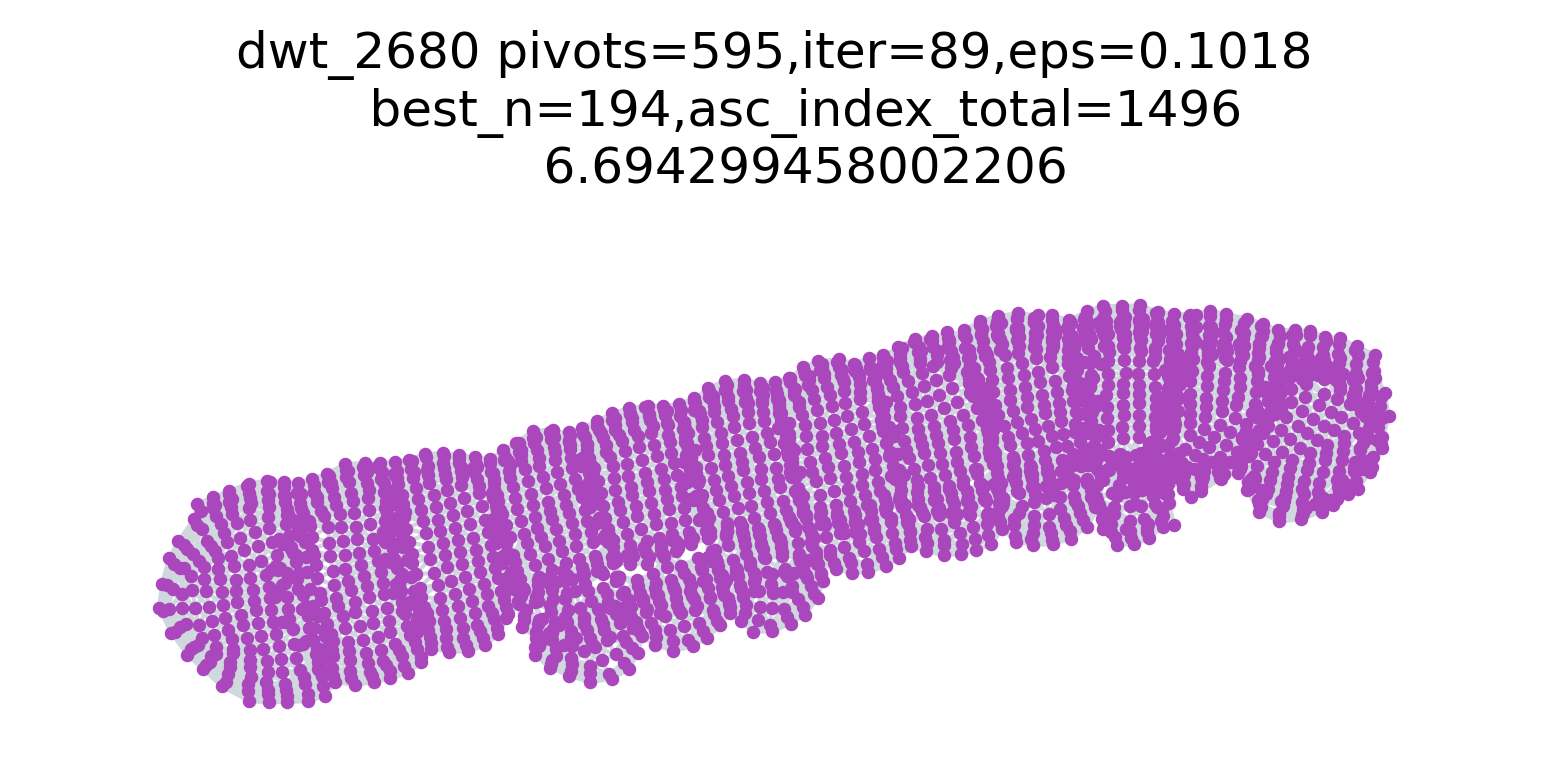

{'angular_resolution': -24030.42578125, 'aspect_ratio': 0.2006857693195343, 'crossing_number': -73925.0, 'gabriel_graph_property': -1294825.0, 'ideal_edge_length': -1389.5283203125, 'neighborhood_preservation': 0.35829558968544006, 'node_resolution': -1325195648.0, 'stress': -45748.453125, 'time_complexity': -167721064.36321136, 'crossing_angle': -0.45705920273926276, 'pivots_rate': 0.8880597014925373, 'iterations': 89, 'eps': 0.101815296329148, 'type': 0, 'angular_resolution_asc_order': 192, 'aspect_ratio_asc_order': 148, 'crossing_angle_asc_order': 156, 'crossing_number_asc_order': 188, 'gabriel_graph_property_asc_order': 190, 'ideal_edge_length_asc_order': 192, 'neighborhood_preservation_asc_order': 176, 'node_resolution_asc_order': 59, 'stress_asc_order': 191, 'time_complexity_asc_order': 4, 'order_sum': 1496, 'pref_order_sum': 1496}


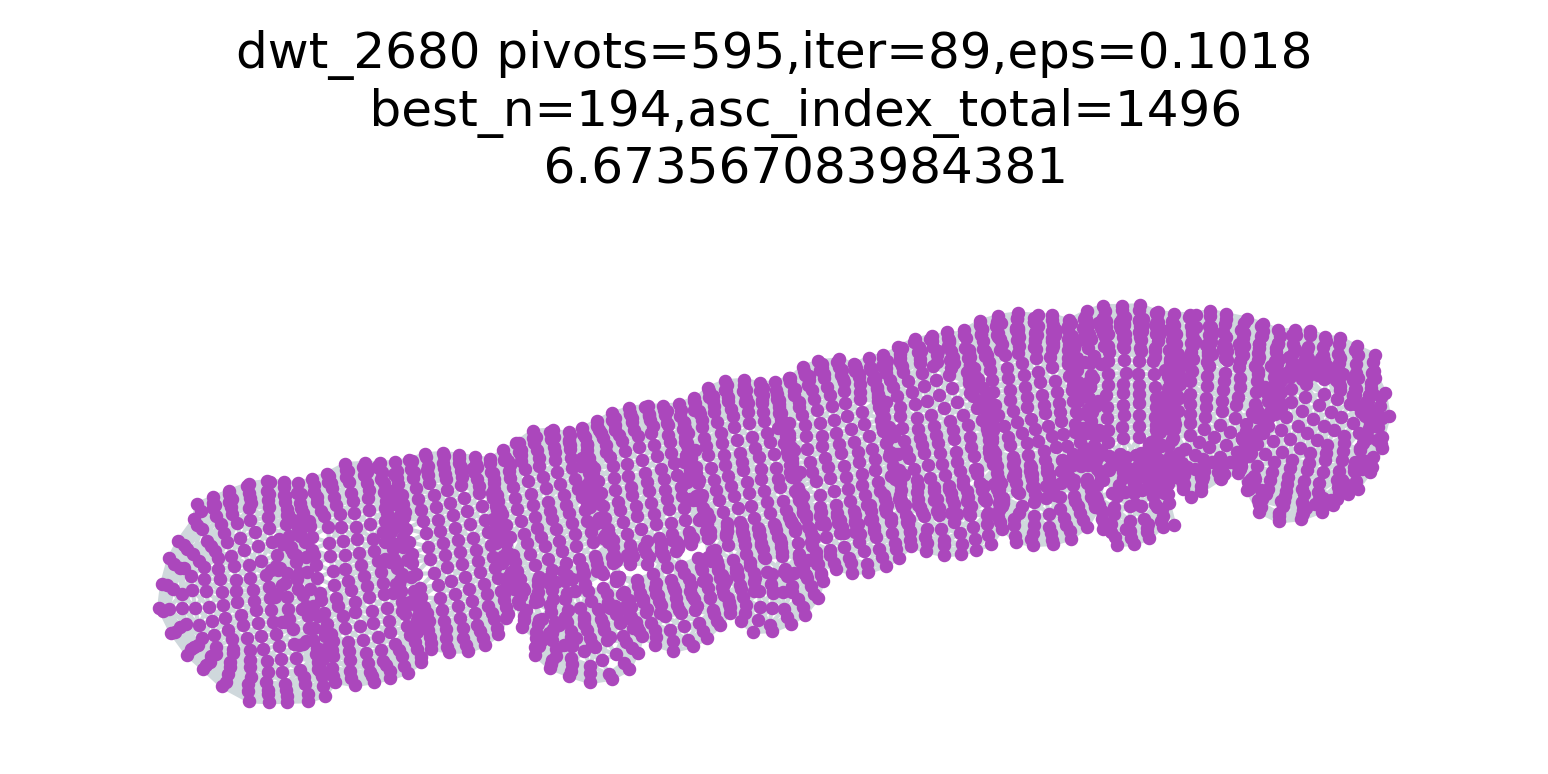

{'angular_resolution': -24042.255859375, 'aspect_ratio': 0.20037975907325745, 'crossing_number': -74002.0, 'gabriel_graph_property': -1290158.75, 'ideal_edge_length': -1395.5030517578125, 'neighborhood_preservation': 0.35965925455093384, 'node_resolution': -1325885696.0, 'stress': -45748.6953125, 'time_complexity': -124365193.36321136, 'crossing_angle': -0.4575720926461447, 'pivots_rate': 0.8880597014925373, 'iterations': 62, 'eps': 0.101815296329148, 'type': 0, 'angular_resolution_asc_order': 191, 'aspect_ratio_asc_order': 127, 'crossing_angle_asc_order': 149, 'crossing_number_asc_order': 186, 'gabriel_graph_property_asc_order': 193, 'ideal_edge_length_asc_order': 191, 'neighborhood_preservation_asc_order': 186, 'node_resolution_asc_order': 45, 'stress_asc_order': 190, 'time_complexity_asc_order': 22, 'order_sum': 1480, 'pref_order_sum': 1480}


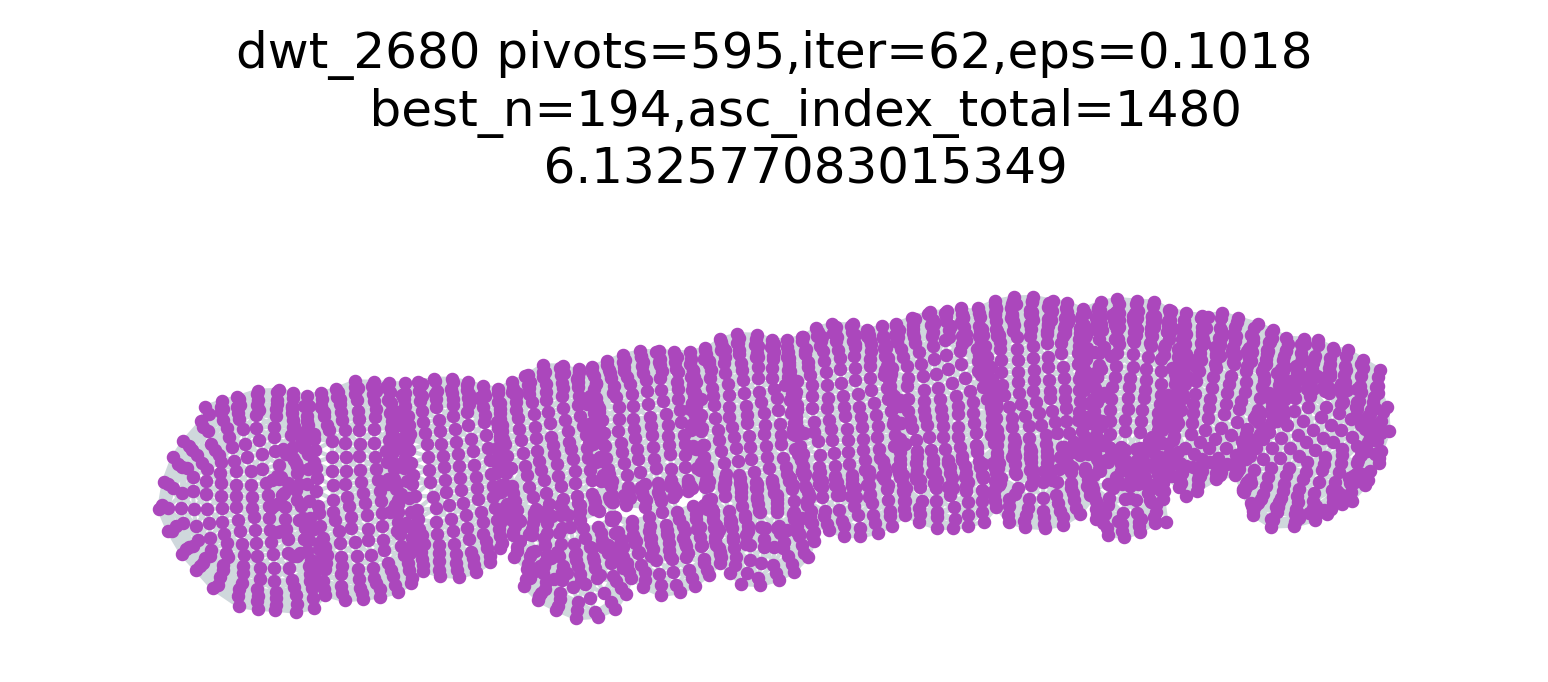

In [44]:
dataset_path = get_dataset_path(d_name)
nx_graph = nx_graph_preprocessing(
    load_nx_graph(dataset_path=dataset_path), EDGE_WEIGHT
)
n_nodes = len(nx_graph.nodes)
import math

p_max = math.ceil(n_nodes * 0.25)

eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)
eg_distance_matrix = all_sources_bfs(eg_graph, EDGE_WEIGHT)

# eg_drawing = Drawing.initial_placement(eg_graph)
# pos, quatliy_metrics = draw_and_measure(
#     pivots=50,
#     iterations=100,
#     eps=0.1,
#     eg_graph=eg_graph,
#     eg_indices=eg_indices,
#     eg_drawing=eg_drawing,
#     eg_distance_matrix=eg_distance_matrix,
#     edge_weight=EDGE_WEIGHT,
#     seed=0,
#     n_nodes=len(nx_graph.nodes),
#     n_edges=len(nx_graph.edges)
# )
# best_trials = best_trials[:1]
# best_trials.append({**quatliy_metrics, 'type': 1})
import math

i = 0
for t in best_trials[:3]:
    p_max = math.ceil(n_nodes * 0.25)
    pivots_rate = t["pivots_rate"]
    pivots = rate2pivots(rate=pivots_rate, n_nodes=p_max)
    iterations = t["iterations"]
    eps = t["eps"]

    eg_drawing = Drawing.initial_placement(eg_graph)

    start = perf_counter()
    pos = draw(
        pivots=pivots,
        iterations=iterations,
        eps=eps,
        eg_graph=eg_graph,
        eg_indices=eg_indices,
        eg_drawing=eg_drawing,
        edge_weight=EDGE_WEIGHT,
        seed=0,
    )
    end = perf_counter()
    fig, ax = plt.subplots(dpi=300, facecolor="white")
    ax.set_aspect("equal")

    ax.set_title(
        f"""{d_name} pivots={pivots},iter={iterations},eps={round(eps, 4)}
    best_n={len(best_trials)},asc_index_total={t['order_sum']}
    {end - start}
"""
    )
    #     {'''
    # '''.join([f'{qm_name}={t[f"{qm_name}_asc_order"]}' for qm_name in qm_names])}
    print(t)

    nx.draw(
        nx_graph,
        pos=pos,
        node_size=5,
        node_color="#AB47BC",
        edge_color="#CFD8DC",
        ax=ax,
    )

    plt.show()

{'angular_resolution': -24042.255859375, 'aspect_ratio': 0.20037975907325745, 'crossing_number': -74002.0, 'gabriel_graph_property': -1290158.75, 'ideal_edge_length': -1395.5030517578125, 'neighborhood_preservation': 0.35965925455093384, 'node_resolution': -1325885696.0, 'stress': -45748.6953125, 'time_complexity': -124365193.36321136, 'crossing_angle': -0.4575720926461447, 'pivots_rate': 0.8880597014925373, 'iterations': 62, 'eps': 0.101815296329148, 'type': 0, 'angular_resolution_asc_order': 191, 'aspect_ratio_asc_order': 127, 'crossing_angle_asc_order': 149, 'crossing_number_asc_order': 186, 'gabriel_graph_property_asc_order': 193, 'ideal_edge_length_asc_order': 191, 'neighborhood_preservation_asc_order': 186, 'node_resolution_asc_order': 45, 'stress_asc_order': 190, 'time_complexity_asc_order': 22, 'order_sum': 1480, 'pref_order_sum': 1480}


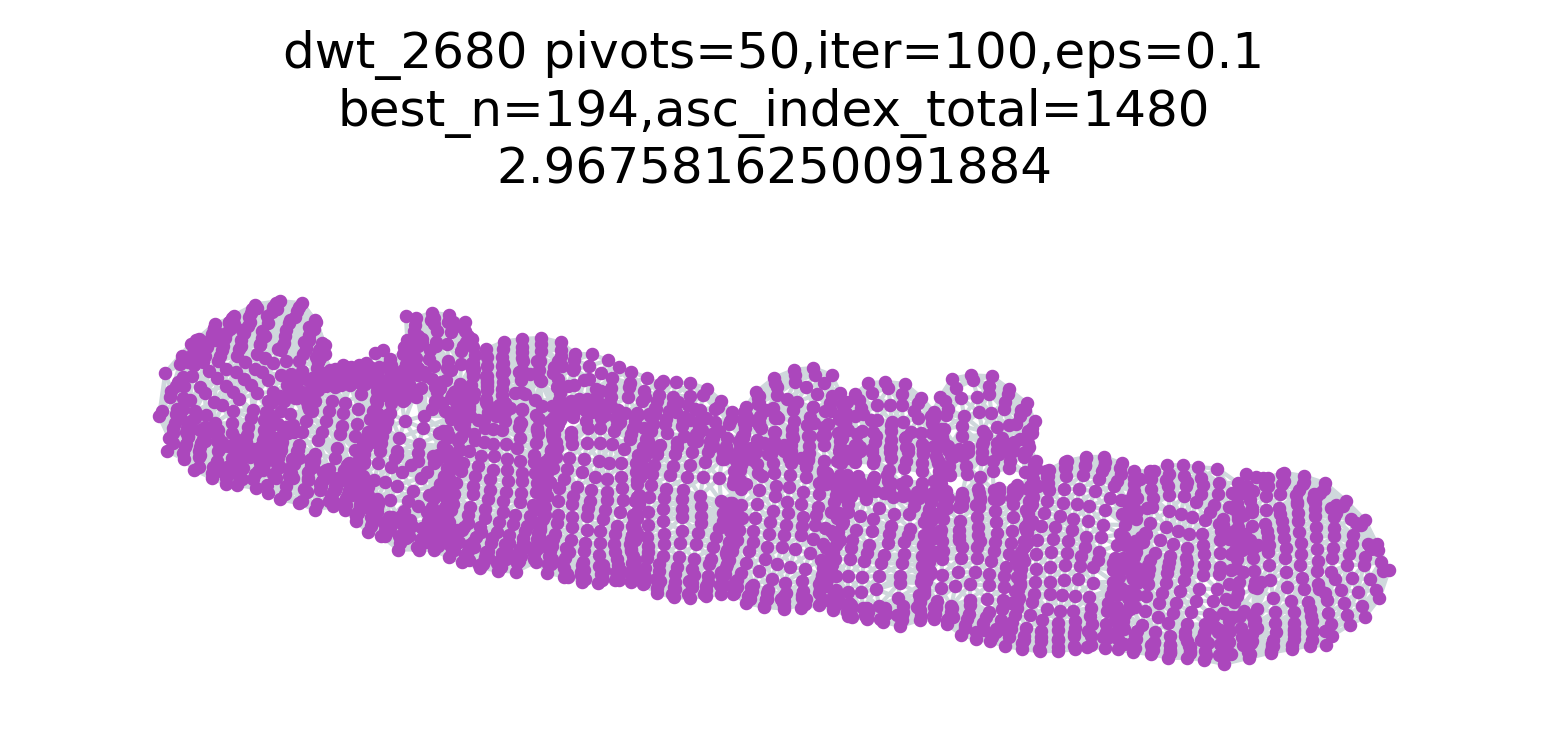

194


In [48]:
from ex_utils.share import draw_and_measure

pivots_rate = 1
pivots = 50
iterations = 100
eps = 0.1

eg_drawing = Drawing.initial_placement(eg_graph)

start = perf_counter()
pos, quatliy_metrics = draw_and_measure(
    pivots=pivots,
    iterations=iterations,
    eps=eps,
    eg_graph=eg_graph,
    eg_indices=eg_indices,
    eg_drawing=eg_drawing,
    edge_weight=EDGE_WEIGHT,
    seed=0,
    n_nodes=n_nodes,
    n_edges=n_nodes,
    eg_distance_matrix=eg_distance_matrix,
)
end = perf_counter()
fig, ax = plt.subplots(dpi=300, facecolor="white")
ax.set_aspect("equal")

ax.set_title(
    f"""{d_name} pivots={pivots},iter={iterations},eps={round(eps, 4)}
best_n={len(best_trials)},asc_index_total={t['order_sum']}
{end - start}
"""
)
#     {'''
# '''.join([f'{qm_name}={t[f"{qm_name}_asc_order"]}' for qm_name in qm_names])}
print(t)

nx.draw(
    nx_graph,
    pos=pos,
    node_size=5,
    node_color="#AB47BC",
    edge_color="#CFD8DC",
    ax=ax,
)

plt.show()

import plotly.graph_objects as go
nb = len(best_trials)
print(nb)
bdf = pd.DataFrame(best_trials[:nb//2])
bdf['type'] = 0
edf = pd.DataFrame([quatliy_metrics])
edf['type'] = 1
df = pd.concat([bdf,edf])
dimensions = [
        dict(
            label=qm_name_abbreviations[qm_name],
            values=df[qm_name],
        )
        for qm_name in qm_names
    ]

fig = go.Figure(
        data=go.Parcoords(
            line=dict(
                color=df["type"],
                colorscale=[[0, "#3F51B5"], [1, "#FFC107"]],
                # colorscale=[[0, "#3F51B5"], [1, "yellow"]],
            ),
            dimensions=list(dimensions),
        )
    )

fig.show()